In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


%matplotlib inline
plt.rcParams.update({'font.size': 16})
plt.style.use('default')

In [2]:
df = pd.read_csv('results.csv')
df['model'] = df['model'].replace({"ResGnn": "ResGAT"})
df['model'] = df['model'].replace({"GlobalInfo": "MPWGI"})

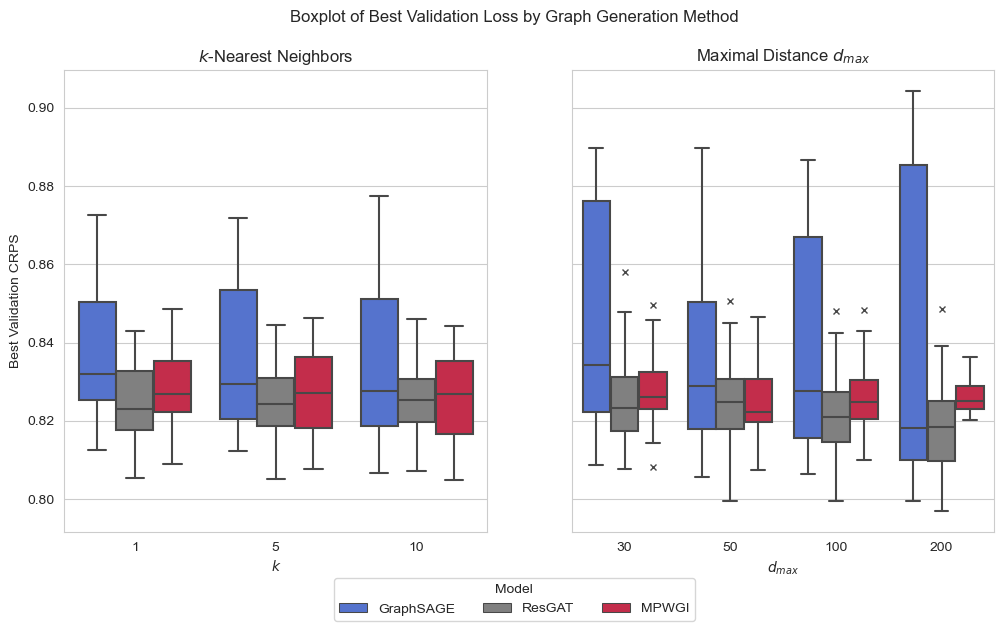

In [3]:
# Create a boxplot
sns.set_style("whitegrid")
custom_order = ["GraphSAGE", "ResGAT", "MPWGI"]
custom_colors = ["royalblue", "grey", "crimson"]

fig, ax = plt.subplots(1,2, sharey=True, figsize=(12,6))
sns.boxplot(x='generate_graph', y='best_val_loss', hue='model', palette=custom_colors, data=df[df.generate_graph < 30], flierprops={"marker": "x"}, dodge=True, ax=ax[0], hue_order=custom_order)
sns.boxplot(x='generate_graph', y='best_val_loss', hue='model', palette=custom_colors, data=df[df.generate_graph >= 30], flierprops={"marker": "x"}, dodge=True, ax=ax[1], hue_order=custom_order)

fig.suptitle('Boxplot of Best Validation Loss by Graph Generation Method')
ax[0].set_title('$k$-Nearest Neighbors')
ax[0].set_xlabel('$k$')
ax[0].set_ylabel('Best Validation CRPS')
ax[0].legend().set_visible(False)

ax[1].set_title('Maximal Distance $d_{max}$')
ax[1].set_xlabel('$d_{max}$')
ax[1].set_ylabel('')
ax[1].legend().set_visible(False)

handles, labels = plt.gca().get_legend_handles_labels()
fig.legend(handles[:3], labels[:3],loc='lower center',bbox_to_anchor=(0.5, -0.05), ncol=3, title="Model")
plt.savefig("Boxplot_CRPS_by_Graph_Generation_Method.pdf", format="pdf", bbox_inches="tight")

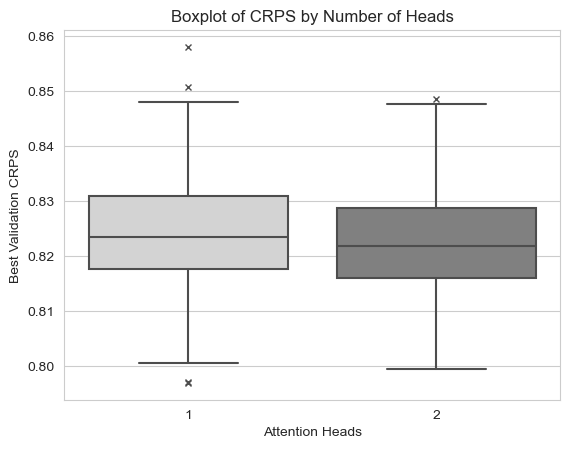

In [90]:
# Create a boxplot
greys = ["lightgrey", "grey"]
sns.set_style("whitegrid")
sns.boxplot(x='heads', y='best_val_loss', palette=greys, data=df, flierprops={"marker": "x"})
plt.title('Boxplot of CRPS by Number of Heads')
plt.xlabel('Attention Heads')
plt.xticks([0,1], [1,2])
plt.ylabel('Best Validation CRPS')
plt.savefig("Boxplot_CRPS_by_Heads.pdf", format="pdf", bbox_inches="tight")

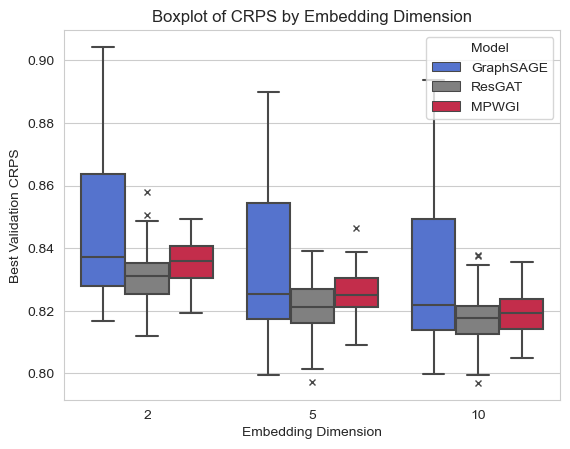

In [84]:
# Create a boxplot
sns.boxplot(x='embed_dim', y='best_val_loss', palette=custom_colors, hue="model", hue_order=custom_order, data=df, flierprops={"marker": "x"})
plt.title('Boxplot of CRPS by Embedding Dimension')
plt.xlabel('Embedding Dimension')
plt.ylabel('Best Validation CRPS')
plt.legend(title='Model')
plt.savefig("Boxplot_CRPS_by_Embedding_Dimension.pdf", format="pdf", bbox_inches="tight")

In [3]:
# Sort dataframe and pick the 300 best runs to make a parallel coordinates plot
df_300 = df.sort_values(by='best_val_loss').head(300)